# Aprendizaje no supervisado

## Inicialización y Datasets

In [6]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Dataset cancer de mama
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Dataset de frutas
fruits = pd.read_table('../data/fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

ModuleNotFoundError: No module named 'seaborn'

In [4]:
!conda env intro-dl

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Reducción dimensional

### Análisis de componentes principales (PCA)

#### Usamos PCA para encontrar las dos componentes principales del dataset de cáncer de mama

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Antes de aplicar PCA, reescalamos cada variable para que tenga media cero y varianza unidad
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


#### Mostramos la versión de los datos transformados tras aplicar  PCA

In [3]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_cancer, ['maligno', 'benigno'])

plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.title('PCA en Dataset cancer de mama (n_components = 2)');

ModuleNotFoundError: No module named 'seaborn'

#### Mostramos el peso de cada feature en las dos primeras componentes principales

<IPython.core.display.Javascript object>


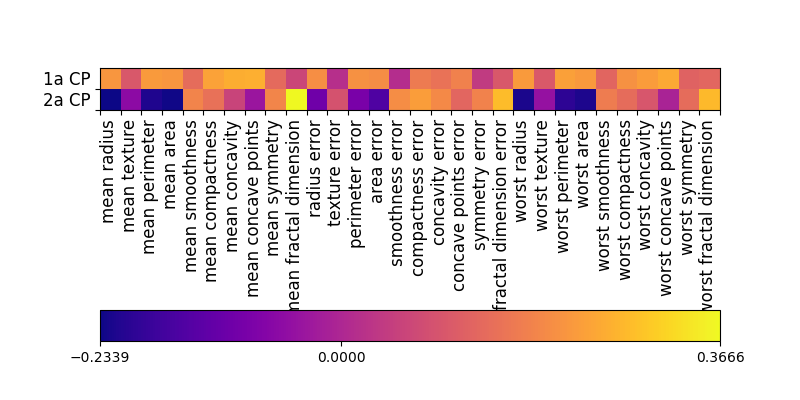

In [6]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['1a CP', '2a CP'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

#### PCA en el dataset de frutas

<IPython.core.display.Javascript object>


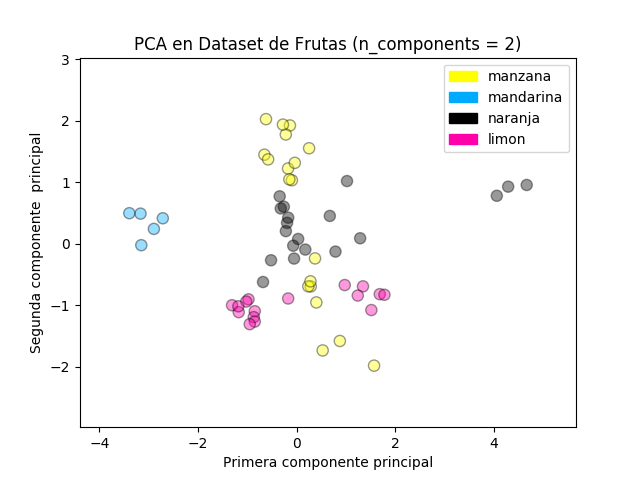

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#  reescalamos cada variable para que tenga media cero y varianza unidad
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_fruits, ['manzana','mandarina','naranja','limon'])

plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente  principal')
plt.title('PCA en Dataset de Frutas (n_components = 2)');

### Reducción dimensional no lineal (manifold learning)

Métodos para encontrar una transformación no lineal de las variables originales, de manera que las 2 ó 3 primeras variables transformadas mantengan en un espacio de dimensión mucho menor, más o menos las mismas distancias que los puntos en el espacio original.

* Un recurso online importante para la teoría es:

http://scikit-learn.org/stable/modules/manifold.html#manifold

* Aquí se puede ver una [comparativa de los distintos métodos](http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py) en un dataset complejo:


#### Escalado Multidimensional  (MDS) en el dataset de frutas

<IPython.core.display.Javascript object>


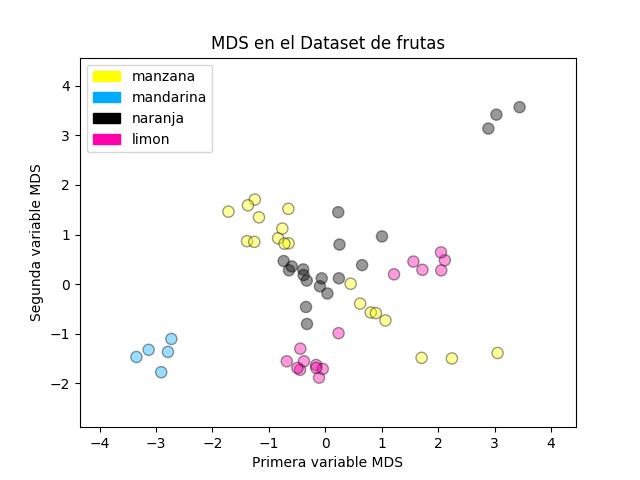

In [8]:
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

#  reescalamos cada variable para que tenga media cero y varianza unidad
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, y_fruits,  ['manzana','mandarina','naranja','limon'])
plt.xlabel('Primera variable MDS')
plt.ylabel('Segunda variable MDS')
plt.title('MDS en el Dataset de frutas');

#### Escalado Multidimensional  (MDS) en el dataset de cáncer de mama

<IPython.core.display.Javascript object>


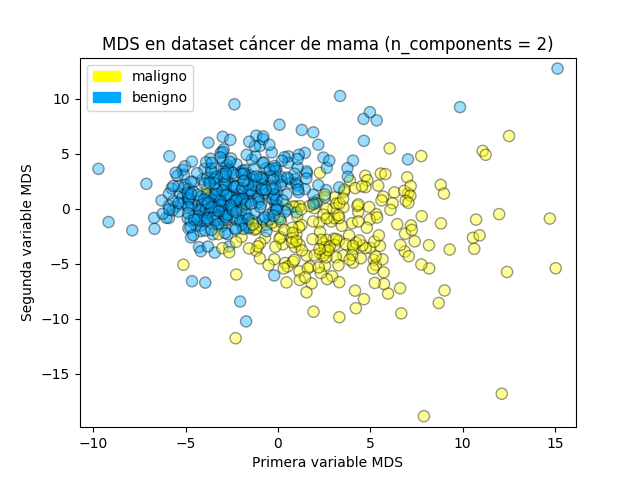

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#  reescalamos cada variable para que tenga media cero y varianza unidad
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_mds, y_cancer, ['maligno', 'benigno'])

plt.xlabel('Primera variable MDS')
plt.ylabel('Segunda variable MDS')
plt.title('MDS en dataset cáncer de mama (n_components = 2)');


### t-Distributed Stochastic Neighbor Embedding (t-SNE)

Aqui hay un [tutorial](https://distill.pub/2016/misread-tsne/) para adquirir algo de intuición sobre la aplicación este método.

También es instructivo mirar la [página web](https://lvdmaaten.github.io/tsne/) del creador del método, Laurens van der Mateen, que contiene implementaciones en muchos lenguajes y una lista de ejemplos.

#### t-SNE en el Dataset de frutas

<IPython.core.display.Javascript object>


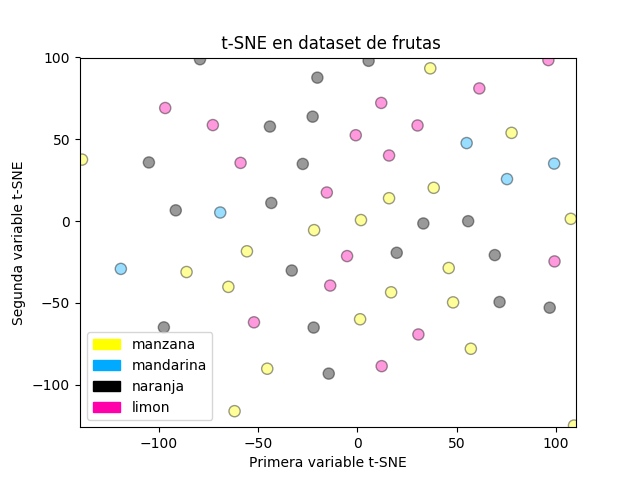

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, y_fruits, 
     ['manzana','mandarina','naranja','limon'])
plt.xlabel('Primera variable t-SNE')
plt.ylabel('Segunda variable t-SNE')
plt.title(' t-SNE en dataset de frutas');

#### t-SNE en dataset cáncer de mama

<IPython.core.display.Javascript object>


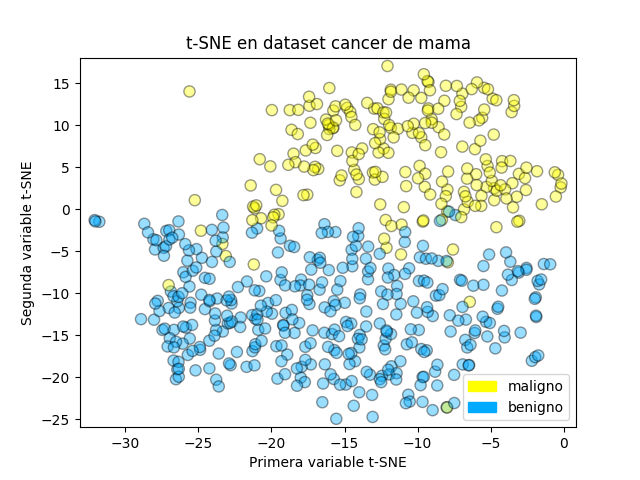

In [11]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['maligno', 'benigno'])
plt.xlabel('Primera variable t-SNE')
plt.ylabel('Segunda variable t-SNE')
plt.title('t-SNE en dataset cancer de mama' );

## Clustering

### K-means

<IPython.core.display.Javascript object>


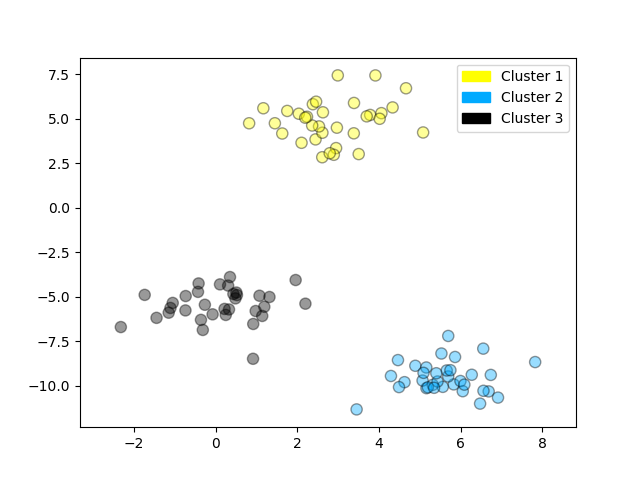

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


En este ejemplo utilizamos el algoritmo k-menas para definir 4 clusters en el dataset de frutas. En general, para utilizar este algoritmo es importante escalar de manera individual las features antes de aplicar el algoritmo.

<IPython.core.display.Javascript object>


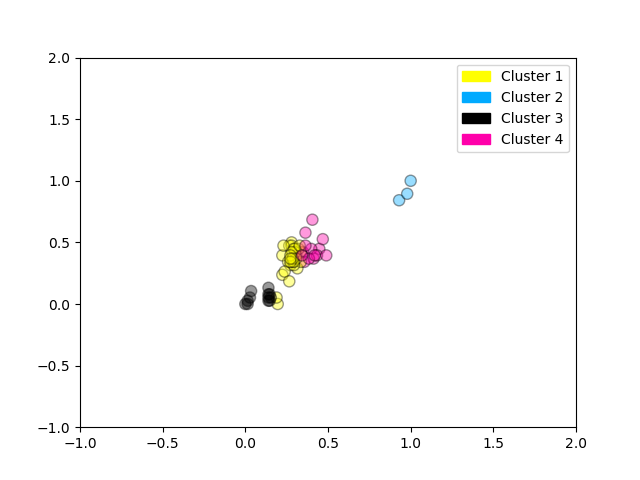

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('../data/fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].as_matrix()
y_fruits = fruits[['fruit_label']] - 1

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_fruits)

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

### Clustering aglomerativo

<IPython.core.display.Javascript object>


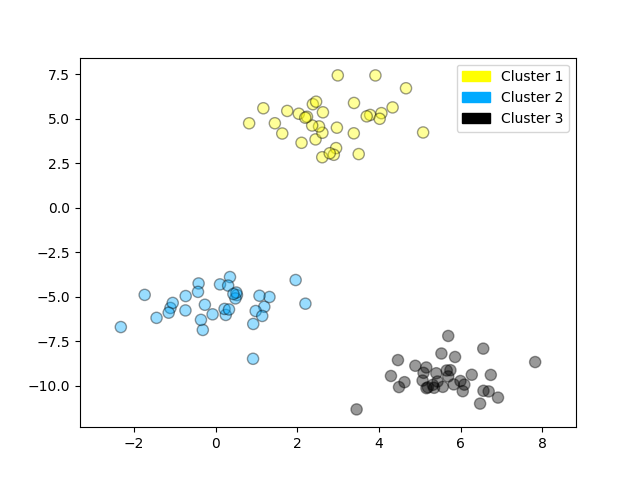

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

#### Creando un dendograma con scipy

Este dendograma está basado en el dataset anterior, pero para una mejor visualización, se han tomado sólo una muestra de 10 puntos.

In [15]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

<IPython.core.display.Javascript object>

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


Aquí está el dendograma obtenido por clustering aglomerativo sobre el dataset de 10 puntos, utilizando el método de Ward. El índice de 0 a 9 corresponde al índice de cada punto en el array X. Vemos pues que el punto con índice 0 (5.69, -9.47) y el punto 9 (5.43, -9.76) son los más cercanos y por tanto los primeros en agregarse.

<IPython.core.display.Javascript object>


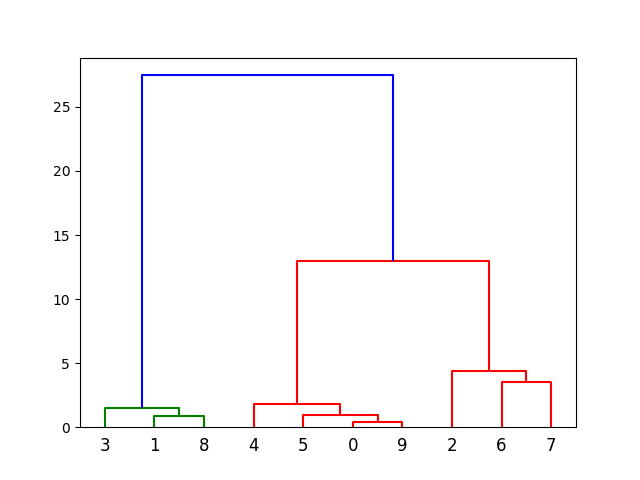

In [14]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

### DBSCAN clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster de pertenencia:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Ruido', 'Cluster 0', 'Cluster 1', 'Cluster 2'])